<a href="https://colab.research.google.com/github/RashmiRajput90/NeuroBot/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 88% 144M/163M [00:00<00:00, 771MB/s] 
100% 163M/163M [00:00<00:00, 610MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print(' The dataset is extracted')

 The dataset is extracted


In [5]:
import os

In [6]:
filenames_with_mask = os.listdir('/content/data/with_mask')
print(filenames_with_mask)

['with_mask_1550.jpg', 'with_mask_2281.jpg', 'with_mask_2292.jpg', 'with_mask_2441.jpg', 'with_mask_2864.jpg', 'with_mask_921.jpg', 'with_mask_2964.jpg', 'with_mask_1578.jpg', 'with_mask_2787.jpg', 'with_mask_1487.jpg', 'with_mask_3268.jpg', 'with_mask_3566.jpg', 'with_mask_743.jpg', 'with_mask_3108.jpg', 'with_mask_1203.jpg', 'with_mask_509.jpg', 'with_mask_1751.jpg', 'with_mask_2034.jpg', 'with_mask_1230.jpg', 'with_mask_2096.jpg', 'with_mask_65.jpg', 'with_mask_3350.jpg', 'with_mask_3186.jpg', 'with_mask_2582.jpg', 'with_mask_3020.jpg', 'with_mask_2472.jpg', 'with_mask_1990.jpg', 'with_mask_1201.jpg', 'with_mask_2127.jpg', 'with_mask_3382.jpg', 'with_mask_3567.jpg', 'with_mask_1001.jpg', 'with_mask_967.jpg', 'with_mask_2997.jpg', 'with_mask_2951.jpg', 'with_mask_2759.jpg', 'with_mask_3233.jpg', 'with_mask_2636.jpg', 'with_mask_2187.jpg', 'with_mask_2050.jpg', 'with_mask_527.jpg', 'with_mask_1834.jpg', 'with_mask_992.jpg', 'with_mask_1116.jpg', 'with_mask_2040.jpg', 'with_mask_1453.j

In [7]:
filenames_without_mask = os.listdir('/content/data/without_mask')
print(filenames_without_mask)

['without_mask_3284.jpg', 'without_mask_3411.jpg', 'without_mask_2859.jpg', 'without_mask_1078.jpg', 'without_mask_1375.jpg', 'without_mask_952.jpg', 'without_mask_2278.jpg', 'without_mask_2900.jpg', 'without_mask_1494.jpg', 'without_mask_1608.jpg', 'without_mask_2615.jpg', 'without_mask_3615.jpg', 'without_mask_713.jpg', 'without_mask_2941.jpg', 'without_mask_3289.jpg', 'without_mask_3322.jpg', 'without_mask_484.jpg', 'without_mask_2843.jpg', 'without_mask_3636.jpg', 'without_mask_1064.jpg', 'without_mask_97.jpg', 'without_mask_2962.jpg', 'without_mask_3471.jpg', 'without_mask_141.jpg', 'without_mask_2299.jpg', 'without_mask_1896.jpg', 'without_mask_1126.jpg', 'without_mask_699.jpg', 'without_mask_169.jpg', 'without_mask_1500.jpg', 'without_mask_1868.jpg', 'without_mask_2674.jpg', 'without_mask_2701.jpg', 'without_mask_3318.jpg', 'without_mask_3089.jpg', 'without_mask_1351.jpg', 'without_mask_613.jpg', 'without_mask_1855.jpg', 'without_mask_2947.jpg', 'without_mask_754.jpg', 'without_

In [8]:
num_of_with_mask = len(filenames_with_mask)
print('Number of images with mask:', num_of_with_mask)

Number of images with mask: 3725


In [9]:
num_of_without_mask = len(filenames_without_mask)
print('Number of images without mask:', num_of_without_mask)

Number of images without mask: 3828


In [10]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

with mask --> 1
without mask --> 0

In [11]:
with_mask_labels = [1]*3725
print(with_mask_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
without_mask_labels = [0]*3828
print(without_mask_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


In [16]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

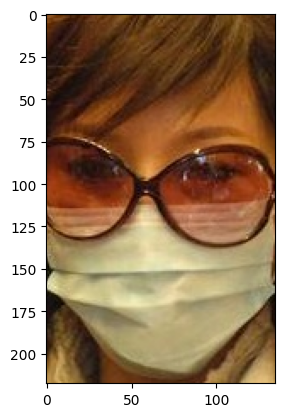

In [17]:
img = mpimg.imread('/content/data/with_mask/with_mask_10.jpg')
plt.imshow(img)

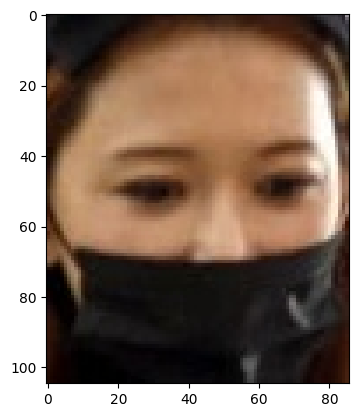

In [18]:
img = mpimg.imread('/content/data/with_mask/with_mask_100.jpg')
plt.imshow(img)

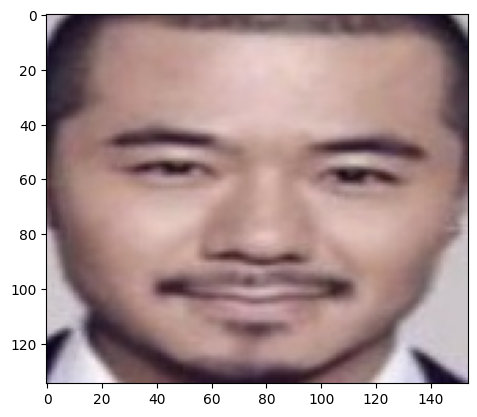

In [19]:
img = mpimg.imread('/content/data/without_mask/without_mask_10.jpg')
plt.imshow(img)

In [20]:
os.mkdir('with_mask_resized')
os.mkdir('without_mask_resized')

In [21]:
with_mask_folder = '/content/data/with_mask/'
with_mask_resized_folder = '/content/with_mask_resized/'
for filename in os.listdir(with_mask_folder):
  img_path = with_mask_folder + filename
  img = Image.open(img_path)
  img = img.resize((128,128))
  img = img.convert('RGB')

  newImgPath = with_mask_resized_folder + filename
  img.save(newImgPath)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
without_mask_folder = '/content/data/without_mask/'
without_mask_resized_folder = '/content/without_mask_resized/'
for filename in os.listdir(without_mask_folder):
  img_path = without_mask_folder + filename
  img = Image.open(img_path)
  img = img.resize((128,128))
  img = img.convert('RGB')

  newImgPath = without_mask_resized_folder + filename
  img.save(newImgPath)

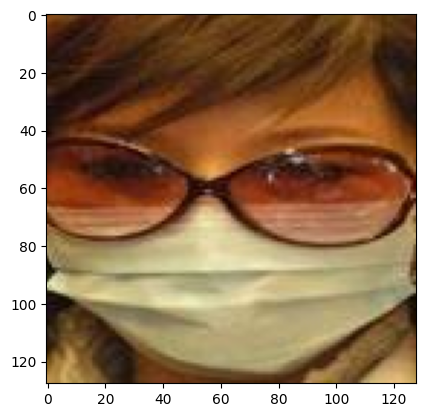

In [23]:
img = mpimg.imread('/content/with_mask_resized/with_mask_10.jpg')
plt.imshow(img)

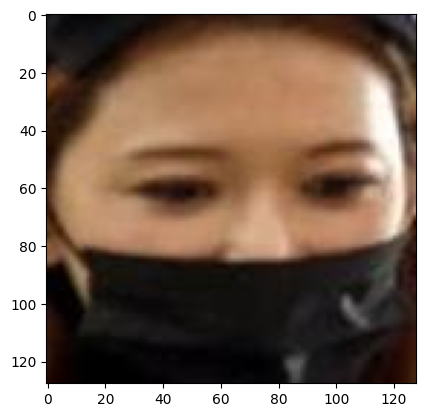

In [24]:
img = mpimg.imread('/content/with_mask_resized/with_mask_100.jpg')
plt.imshow(img)

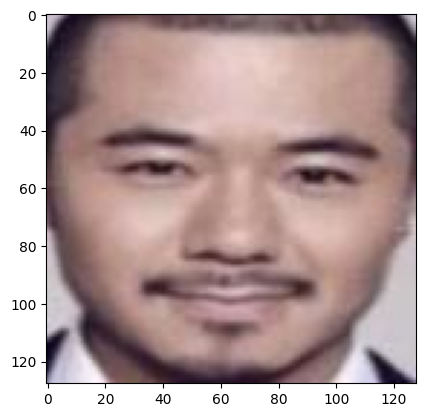

In [25]:
img = mpimg.imread('/content/without_mask_resized/without_mask_10.jpg')
plt.imshow(img)

In [26]:
import cv2
import glob

In [27]:
# reading with_mask images
imdir = '/content/with_mask_resized/'
ext = ['png','jpg']

files = []
[files.extend(glob.glob(imdir + '*.'+ e)) for e in ext]

with_mask_images = np.asarray([cv2.imread(file) for file in files])

In [28]:
# reading without_mask images
imdir = '/content/without_mask_resized/'
ext = ['png','jpg']

files = []
[files.extend(glob.glob(imdir + '*.'+ e)) for e in ext]

without_mask_images = np.asarray([cv2.imread(file) for file in files])

In [29]:
print(with_mask_images)

[[[[ 85  97 101]
   [ 83  95  99]
   [ 82  94  98]
   ...
   [ 79  88  91]
   [ 80  89  92]
   [ 79  88  91]]

  [[ 84  96 100]
   [ 82  94  98]
   [ 81  93  97]
   ...
   [ 78  87  90]
   [ 76  85  88]
   [ 73  82  85]]

  [[ 85  95 102]
   [ 84  94 101]
   [ 82  92  99]
   ...
   [ 78  87  90]
   [ 73  82  85]
   [ 67  76  79]]

  ...

  [[ 83  63  58]
   [ 76  57  52]
   [ 71  52  47]
   ...
   [152 175 221]
   [148 171 217]
   [134 157 203]]

  [[ 79  58  60]
   [ 73  55  54]
   [ 68  50  49]
   ...
   [148 171 217]
   [139 162 210]
   [121 144 192]]

  [[ 70  51  54]
   [ 69  51  52]
   [ 62  46  47]
   ...
   [145 168 214]
   [133 156 204]
   [112 135 183]]]


 [[[212 211 213]
   [200 199 201]
   [228 227 229]
   ...
   [226 217 207]
   [222 213 204]
   [218 209 200]]

  [[209 208 210]
   [159 158 160]
   [131 130 132]
   ...
   [179 170 160]
   [201 192 183]
   [222 213 204]]

  [[226 225 227]
   [120 119 121]
   [  0   0   1]
   ...
   [122 115 106]
   [168 160 153]
   [214 206

In [30]:
print(without_mask_images)

[[[[ 23  31  60]
   [ 21  29  58]
   [ 16  24  53]
   ...
   [ 18  24  35]
   [ 12  21  31]
   [ 10  19  29]]

  [[ 21  29  58]
   [ 19  27  56]
   [ 16  24  53]
   ...
   [ 20  26  37]
   [ 15  24  34]
   [ 14  23  33]]

  [[ 17  25  54]
   [ 16  24  53]
   [ 15  23  52]
   ...
   [ 23  29  40]
   [ 18  27  37]
   [ 17  26  36]]

  ...

  [[ 39  47  77]
   [ 75  83 113]
   [112 123 151]
   ...
   [ 50  49  65]
   [ 49  49  63]
   [ 46  46  60]]

  [[ 45  50  81]
   [ 78  86 116]
   [115 125 155]
   ...
   [ 37  36  52]
   [ 37  37  51]
   [ 36  36  50]]

  [[ 59  64  95]
   [ 87  95 125]
   [120 128 158]
   ...
   [ 28  27  43]
   [ 29  29  43]
   [ 30  30  44]]]


 [[[232 232 232]
   [232 232 232]
   [232 232 232]
   ...
   [208 210 211]
   [208 210 211]
   [209 211 212]]

  [[232 232 232]
   [232 232 232]
   [232 232 232]
   ...
   [208 210 211]
   [208 210 211]
   [209 211 212]]

  [[232 232 232]
   [232 232 232]
   [232 232 232]
   ...
   [208 210 211]
   [208 210 211]
   [209 211

In [31]:
print(with_mask_images.shape)
print(without_mask_images.shape)

(3725, 128, 128, 3)
(3828, 128, 128, 3)


In [32]:
combined_image = np.concatenate((with_mask_images, without_mask_images))

In [33]:
print(combined_image.shape)

(7553, 128, 128, 3)


In [34]:
print(combined_image)

[[[[ 85  97 101]
   [ 83  95  99]
   [ 82  94  98]
   ...
   [ 79  88  91]
   [ 80  89  92]
   [ 79  88  91]]

  [[ 84  96 100]
   [ 82  94  98]
   [ 81  93  97]
   ...
   [ 78  87  90]
   [ 76  85  88]
   [ 73  82  85]]

  [[ 85  95 102]
   [ 84  94 101]
   [ 82  92  99]
   ...
   [ 78  87  90]
   [ 73  82  85]
   [ 67  76  79]]

  ...

  [[ 83  63  58]
   [ 76  57  52]
   [ 71  52  47]
   ...
   [152 175 221]
   [148 171 217]
   [134 157 203]]

  [[ 79  58  60]
   [ 73  55  54]
   [ 68  50  49]
   ...
   [148 171 217]
   [139 162 210]
   [121 144 192]]

  [[ 70  51  54]
   [ 69  51  52]
   [ 62  46  47]
   ...
   [145 168 214]
   [133 156 204]
   [112 135 183]]]


 [[[212 211 213]
   [200 199 201]
   [228 227 229]
   ...
   [226 217 207]
   [222 213 204]
   [218 209 200]]

  [[209 208 210]
   [159 158 160]
   [131 130 132]
   ...
   [179 170 160]
   [201 192 183]
   [222 213 204]]

  [[226 225 227]
   [120 119 121]
   [  0   0   1]
   ...
   [122 115 106]
   [168 160 153]
   [214 206

In [35]:
# data and labels
X = combined_image
Y = np.asarray(labels)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (6042,) (1511, 128, 128, 3) (1511,)


In [38]:
print(X_train[0])

[[[234 242 249]
  [239 255 255]
  [219 255 234]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[231 252 243]
  [209 241 222]
  [144 200 159]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[216 255 226]
  [157 219 167]
  [ 41 126  52]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 21  15  16]
  [ 19  13  14]
  [ 19  13  14]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 17  11  12]
  [ 16  10  11]
  [ 17  11  12]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 16  10  11]
  [ 16  10  11]
  [ 17  11  12]]]


In [39]:
X_train_std = X_train/255.0
X_test_std = X_test/255.0

In [40]:
print(X_train_std)

[[[[0.91764706 0.94901961 0.97647059]
   [0.9372549  1.         1.        ]
   [0.85882353 1.         0.91764706]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  [[0.90588235 0.98823529 0.95294118]
   [0.81960784 0.94509804 0.87058824]
   [0.56470588 0.78431373 0.62352941]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  [[0.84705882 1.         0.88627451]
   [0.61568627 0.85882353 0.65490196]
   [0.16078431 0.49411765 0.20392157]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.08235294 0.05882353 0.0627451 ]
   [0.0745098  0.05098039 0.05490196]
   [0.0745098  0.05098039 0.05490196]]

  [[1.         1.         1.        ]
   [1. 

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(128,128,3)),
keras.layers.Dense(70,activation='relu'),
keras.layers.Dense(70, activation='relu'),
keras.layers.Dense(1,activation='sigmoid')
                          ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [44]:
model.fit(X_train_std, Y_train, epochs=10)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5127 - loss: nan
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5031 - loss: nan
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5004 - loss: nan
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5033 - loss: nan
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5166 - loss: nan
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5076 - loss: nan
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5050 - loss: nan
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5115 - loss: nan
Epoch 9/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5070 - loss: nan
Epoch 10/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5046 - loss: nan


In [46]:
score, acc = model.evaluate(X_test_std, Y_test)
print('Test data loss:', score)
print('Test data accuracy:', acc)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4969 - loss: nan
Test data loss: nan
Test data accuracy: 0.508272647857666


In [47]:
from google.colab.patches import cv2_imshow

Path of the image to be predicted :/content/data/with_mask/with_mask_1.jpg


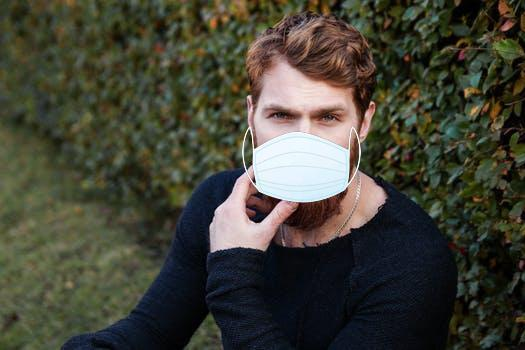

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
[[nan]]
1
The person is wearing mask


In [48]:
input_image_path = input('Path of the image to be predicted :')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (128,128))
input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize,[1,128,128,3] )
input_prediction = model.predict(image_reshape)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
input_pred_label = 1 if input_pred_label == 1 else 1
print(input_pred_label)

if input_pred_label == 1:
    print('The person is wearing mask')
else:
    print('The person is not wearing mask')


In [ ]:
input_image_path = input('Path of the image to be predicted :')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (128,128))
input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize,[1,128,128,3] )
input_prediction = model.predict(image_reshape)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
input_pred_label = 0 if input_pred_label == 0 else 1
print(input_pred_label)

if input_pred_label == 1:
    print('The person is wearing mask')
else:
    print('The person is not wearing mask')